# Elementary cellular automata

In [2]:
from itertools import product
import matplotlib.pyplot as plt

In [27]:
def bin_from_int(x):
    return [int(bit) for bit in format(x, f'08b')]

def int_from_bin(bits_list):
    return int(''.join(str(bit) for bit in bits_list), 2)

def get_neighborhoods(lst):
    n = len(lst)
    neighborhood = [[lst[(i-1) % n], lst[i], lst[(i+1) % n]] for i in range(n)]
    return neighborhood

In [29]:
def eca_step(rule_number, configuration):
    triple_bits = [list(tup) for tup in list(product([1, 0], repeat=3))]
    rule = bin_from_int(rule_number)
    neighborhoods = get_neighborhoods(configuration)
    next_configuration = [rule[triple_bits.index(neighborhood)] for neighborhood in neighborhoods]

    return next_configuration

initial_config = [0, 0, 0, 0, 1, 0, 0]
eca_step(30, initial_config)


[0, 0, 0, 1, 1, 1, 0]

In [35]:
def eca_steps(rule_number, configuration, steps):
    result = [eca_step(rule_number, configuration)]

    for _ in range(steps - 1):
        result.append(eca_step(rule_number, result[-1]))

    return result

initial_config = [0, 0, 0, 0, 1, 0, 0]
eca_steps(30, initial_config, 3)

[[0, 0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 0, 0, 1], [1, 1, 1, 0, 1, 1, 1]]

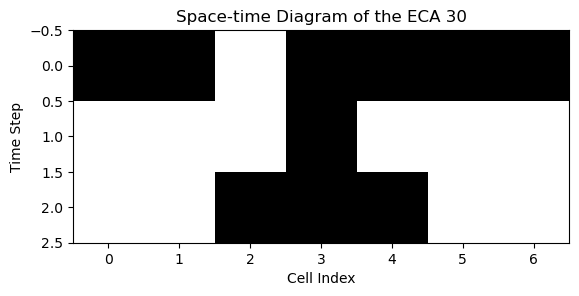

In [34]:
def eca_visualize(rule_number, configuration, steps):
    plt.imshow(eca_steps(rule_number, configuration, steps), cmap='binary')
    plt.xlabel('Cell Index')
    plt.ylabel('Time Step')
    plt.title(f'Space-time Diagram of the ECA {rule_number}')
    

initial_config = [1, 0, 0, 0, 1, 0, 0]
eca_visualize(30, initial_config, 3)


# Stworzyłem jeszcze swoją klasę aby potem łatwiej się pracowało

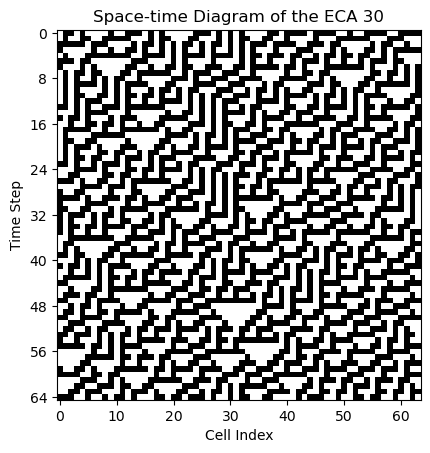

In [36]:
from eca import ECA

automaton = ECA.init_random(64)
#automaton = ECA.init_config([1, 0, 0, 0, 1, 0, 0])
automaton.evolve(30, 64)
automaton.visualize()